# Statistical Data Analysis

At this point, it's time to apply some inferential statistical techniques to the data that's thus far been explored. We'll start by trying to determine if there's any correlation between provided variables. 

In [4]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
#Import data

#File Names
adoptfile  = 'tidy_data/adoption_speed.csv'
colorfile  = 'tidy_data/color_labels.csv'
wormfile   = 'tidy_data/dewormed.csv'
breedfile  = 'tidy_data/dog_breeds.csv'
datafile   = 'tidy_data/dog_data.csv'
furfile    = 'tidy_data/fur_length.csv'
healthfile = 'tidy_data/health.csv'
sizefile   = 'tidy_data/size.csv'
statefile  = 'tidy_data/state_labels.csv'
fixedfile  = 'tidy_data/sterilized.csv'
vacfile    = 'tidy_data/vaccine.csv'

#Import Files
adptspeed  = pd.read_csv(adoptfile)
color      = pd.read_csv(colorfile)
dewormed   = pd.read_csv(wormfile)
breeds     = pd.read_csv(breedfile)
dog_data   = pd.read_csv(datafile)
fur_length = pd.read_csv(furfile)
health     = pd.read_csv(healthfile)
adult_size = pd.read_csv(sizefile)
state=pd.read_csv(statefile)
fixed = pd.read_csv(fixedfile)
vaccinated = pd.read_csv(vacfile)

In [8]:
#Separate dog_data into test data (for future use in machine learning) and data to work with
dogs_train = dog_data[dog_data.AdoptionSpeed.notnull()]
dogs_test = dog_data[dog_data.AdoptionSpeed.isnull()]

#Save dogs_train and dogs_test as files for later use 
dogs_train.to_csv(r'tidy_data/dogs_train.csv',index=False)
dogs_test.to_csv(r'tidy_data/dogs_test.csv',index=False)

Knowing that this is nearly all categorical data that has been converted to numeric, hypothesis testing will be performed using the Chi-Square method. However, there is some continuous data - in the variables number of dogs per listing, fee, video amount, and photo amount. Which will make correlation interesting. 

Based on the previous work done, the following hypotheses will be tested: 
1. Adoption speed is independent of life stage (age).
    - We expect that life stage and adoption speed are dependent.
2. Adoption speed is indepdent of name.
    - We expect that name has no impact on adoption speed.
3. Adoption speed is independent of breed.
    - We expect that breed has some impact. 
4. Adoption speed is independent of size.
    - We expect that size has some impact on adoption speed. 
5. Adoption speed is indepdent of fur length.
    - We expect that there is no relationship between adoption speed and fur length. 
6. Adoption speed is independent of color.
    - We expect that color has some impact on adoption speed. 
7. Adoption speed is independent to of the number of photos.
    - We expect that photos have some impact but there are diminishing returns after 2. However, we'll be testing whether they matter or not in this test. 
8. Adoption speed is not faster if there are videos. 
    - We expect there is no relationship between videos and adoption speed
9. Adoption speed is independent of vaccination.
    - We expect that there is some impact on adoption speed if the animal is vaccinated. 
10. Adoption speed is independent of sterilization
    - We expect that there is some impact on adoption speed if the animal is sterilized 
11. Adoption speed is independent of worming status.
    - We expect that there is some impact on adoption speed if the animal is dewormed. 
12. Adoption speed is independent of health status.
    - We expect that there is an impact on adoption speed if the animal is healthy 
13. Adoption speed is independent of cost. 
    - We expect that there is no impact on adoption speed with cost. 

In [19]:
#Remove variables that will not be tested from the dataframe. 
dogs = dogs_train.drop(['index','PetID','Description','RescuerID','State',],axis=1)
dogs.head()

,Name,Age,Breed1,Breed2,BreedCount,Gender,Color1,Color2,Color3,ColorCount,...,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
2100,Brisco,1,307,0,1,1,2,7,0,2,...,2,1,1,2,1,1,0,0,7,3.0
2101,Miko,4,307,0,1,2,1,2,0,2,...,1,1,1,2,1,1,150,0,8,2.0
2102,Hunter,1,307,0,1,1,1,0,0,1,...,1,2,2,2,1,1,0,0,3,2.0
2103,Siu Pak,0,307,0,1,2,1,2,7,3,...,1,2,2,2,1,6,0,0,9,3.0
2104,Bear,2,307,0,1,1,1,2,7,3,...,1,2,1,2,1,1,0,0,7,1.0


In [21]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8130 entries, 2100 to 10229
Data columns (total 21 columns):
Name             5768 non-null object
Age              8130 non-null int64
Breed1           8130 non-null int64
Breed2           8130 non-null int64
BreedCount       8130 non-null int64
Gender           8130 non-null int64
Color1           8130 non-null int64
Color2           8130 non-null int64
Color3           8130 non-null int64
ColorCount       8130 non-null int64
MaturitySize     8130 non-null int64
FurLength        8130 non-null int64
Vaccinated       8130 non-null int64
Dewormed         8130 non-null int64
Sterilized       8130 non-null int64
Health           8130 non-null int64
Quantity         8130 non-null int64
Fee              8130 non-null int64
VideoAmt         8130 non-null int64
PhotoAmt         8130 non-null int64
AdoptionSpeed    8130 non-null float64
dtypes: float64(1), int64(19), object(1)
memory usage: 1.7+ MB


In [58]:
#Convert the names column to ordinal values 1 if named, 0 if not named and add a new column
dogs['Name_bool']=dogs.Name.notnull().astype(int)
dogs.head()

,Name,Age,Breed1,Breed2,BreedCount,Gender,Color1,Color2,Color3,ColorCount,...,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,Name_bool
2100,Brisco,1,307,0,1,1,2,7,0,2,...,1,1,2,1,1,0,0,7,3.0,1
2101,Miko,4,307,0,1,2,1,2,0,2,...,1,1,2,1,1,150,0,8,2.0,1
2102,Hunter,1,307,0,1,1,1,0,0,1,...,2,2,2,1,1,0,0,3,2.0,1
2103,Siu Pak,0,307,0,1,2,1,2,7,3,...,2,2,2,1,6,0,0,9,3.0,1
2104,Bear,2,307,0,1,1,1,2,7,3,...,2,1,2,1,1,0,0,7,1.0,1


Starting with the continuous variables, let's see if there's any correlation betweeen them and adoption speed. 

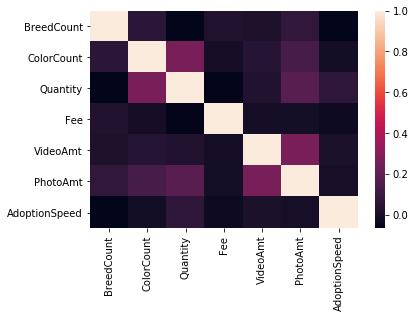

In [66]:
#Create dataframe of continous variables only
cont_var = dogs[['BreedCount','ColorCount','Quantity','Fee','VideoAmt','PhotoAmt','AdoptionSpeed']].copy()


#Correlate dataframe using Pearson Method
cont_corr = cont_var.corr(method='pearson')
sns.heatmap(cont_corr, 
        xticklabels=cont_corr.columns,
        yticklabels=cont_corr.columns)

Let's try again using a Kendall rank correlaton, to account for the ordinal nature of Adoption speed. 

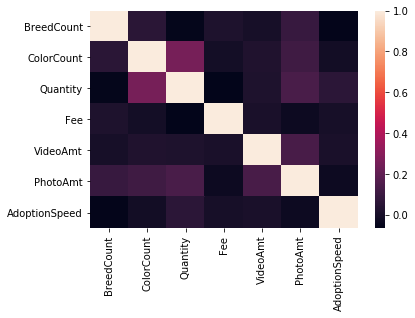

In [70]:
cont_corrk = cont_var.corr(method='kendall')
sns.heatmap(cont_corrk, 
        xticklabels=cont_corrk.columns,
        yticklabels=cont_corrk.columns)

So it appears there is little to no correlation between Adoption speed and photo amount, video amount, number of breeds, number of colors of an animal, number of animals in a listing, or the adoption fee. This is somewhat consistent with what we found during EDA, but this may be due to the use of color count and breed count rather than the actual colors/breeds.

Another issue with this is that, even though its been converted to ordinal values, the adoption speed feature is still categorical rather than continuous. 

Let's try something similar using only the categorical/discrete data. In this instance we can will be using Cramer's V.  

In [78]:
#Create dataframe 
dis_var = dogs[['Age', 'Breed1', 'Breed2', 'Gender',
       'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'AdoptionSpeed']].copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8130 entries, 2100 to 10229
Data columns (total 14 columns):
Age              8130 non-null int64
Breed1           8130 non-null int64
Breed2           8130 non-null int64
Gender           8130 non-null int64
Color1           8130 non-null int64
Color2           8130 non-null int64
Color3           8130 non-null int64
MaturitySize     8130 non-null int64
FurLength        8130 non-null int64
Vaccinated       8130 non-null int64
Dewormed         8130 non-null int64
Sterilized       8130 non-null int64
Health           8130 non-null int64
AdoptionSpeed    8130 non-null float64
dtypes: float64(1), int64(13)
memory usage: 952.7 KB


In [79]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = dis_var.values
cramers_v(confusion_matrix)

0.20553525618218624

Not the most helpful. This value indicates that there's some correlation, but that it's not high. This may be because of the sheer number of features being compared. It would be better to break it down and compare a few at a time. Let's do this and also perform some Chi-squared hypothesis testing. First, we'll build a function to perform chi-squared testing. 

In [105]:
def chi2_quick(var1 , var2, alpha):
    #Build contingency table
    test_table = pd.crosstab(var1, var2)
    
    #run test and print results
    chi2, p, dof, ex = scipy.stats.chi2_contingency(test_table,correction=False)
    print("Chi-Squared Value: " + chi2.astype(str))
    print("P-value:           " + p.astype(str))
    
    #analyze hypothesis test results
    if p-alpha > 0:
        print('Fail to reject the null hypothesis.')
    else:
        print('Reject the null hypothesis.')

Let's first look at the relationship between Adoption Speed and the animal's age. Based on our EDA, our hypothesis is that some animals are adopted faster than others based on their age, with puppies being adopted fastest, and seniors being adopted slowest. 

Our hypotheses will be as follows: 

$H_{o}$ :  There's no association between adoption speed and animal age (they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and animal age (they are dependent). 

In [106]:
chi2_quick(dogs.AdoptionSpeed,dogs.Age,0.05)

Chi-Squared Value: 939.1594644503268
P-value:           1.3153758996338866e-44
Reject the null hypothesis.


As expected, there is a relationship between Animal age and adoption speed, they are not independent. The p-value is nearly zero, which is very signifcant. 

Now, let's look at Names. We'll test this two ways, first with the given names, then with the column created earlier for name presence/abscence. It's likely that the animal having a name is more significant than if the animal has a certain name. 

__Test 1: Name__

$H_{o}$ :  There's no association between adoption speed and an animals name (they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and an animals name (they are dependent). 

__Test 2: Having a Name__

$H_{o}$ :  There's no association between adoption speed and whether an animal has a name (they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and whether an animal has a name (they are dependent). 


In [107]:
chi2_quick(dogs.AdoptionSpeed,dogs.Name,0.05)

Chi-Squared Value: 13096.10522814824
P-value:           0.982640919909568
Fail to reject the null hypothesis.


In [112]:
chi2_quick(dogs.AdoptionSpeed,dogs.Name_bool,0.05)

Chi-Squared Value: 10.460163032971407
P-value:           0.033350180335833514
Reject the null hypothesis.


It does appear that the actual name and adoption speed are likely independent. Whether or not the dog has a name has does impact adoption speed.  

Let's look at breeds. We'll again test this two ways, first with the given breeds, then with the column created earlier for total number of breeds. The EDA suggests that breed and Adoption speed are dependent, but it is more significant if the dog is mixed or purebred. 

__Test 1: Breed__

$H_{o}$ :  There's no association between adoption speed and breed (they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and breed (they are dependent). 

__Test 1: Mixed vs Purebred__

$H_{o}$ :  There's no association between adoption speed and breed count (they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and breed count (they are dependent). 

In [114]:
#Test 1
chi2_quick(dogs.AdoptionSpeed,[dogs.Breed1,dogs.Breed2],0.05)

Chi-Squared Value: 2738.2095258748595
P-value:           2.391983085372165e-41
Reject the null hypothesis.


In [113]:
#Test 2
chi2_quick(dogs.AdoptionSpeed,dogs.BreedCount,0.05)

Chi-Squared Value: 75.32650464044923
P-value:           1.6996352533052921e-15
Reject the null hypothesis.


So both the breed of the dog and whether the dog is mixed vs purebred have an impact on adoption speed, and are very signifcant as the both have a P value of nearly zero. 

Size is another feature that we expect to have an impact on adoption speed. 

__Size__ 

$H_{o}$ :  There's no association between adoption speed and adult size (they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and adult size(they are dependent). 


In [115]:
#Adoption speed vs Maturity Size
chi2_quick(dogs.AdoptionSpeed,dogs.MaturitySize,0.05)

Chi-Squared Value: 102.47588431632957
P-value:           1.8198914850580224e-16
Reject the null hypothesis.


Again, there is a definite relationship between adoption speed and adult size, which we expected based on the results of EDA. 

During EDA, fur length appeared to have no impact on adoption speed, let's test that now. 

__Fur Length__ 

$H_{o}$ :  There's no association between adoption speed and fur length (they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and fur length (they are dependent). 

In [116]:
#Adoption speed vs Fur Length
chi2_quick(dogs.AdoptionSpeed,dogs.FurLength,0.05)

Chi-Squared Value: 106.13956310763294
P-value:           2.3618386379993065e-19
Reject the null hypothesis.


It appears that there is actually a relationship between adoption speed and fur length, and that it is significant, which is unexpected. 

The color of the animal is another variable expected from EDA to have some impact on Adoption Speed. Let's examine this now. As before, we'll examine vs each color and vs. number of colors. 

__Color__ 

$H_{o}$ :  There's no association between adoption speed and fur color (they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and fur color (they are dependent). 

__Number of Colors__ 

$H_{o}$ :  There's no association between adoption speed and dogs with more than one fur color (they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and dogs with more than one fur color (they are dependent). 

In [159]:
#Adoption speed vs Fur Color
print('Color1')
chi2_quick(dogs.AdoptionSpeed,dogs.Color1,0.05)

print('Color2')
chi2_quick(dogs.AdoptionSpeed,dogs.Color2,0.05)

print('Color3')
chi2_quick(dogs.AdoptionSpeed,dogs.Color3,0.05)

#All colors
print('All Colors')
chi2_quick(dogs.AdoptionSpeed,[dogs.Color1,dogs.Color2,dogs.Color3],0.05)

Color1
Chi-Squared Value: 74.19889634404254
P-value:           4.968388449135628e-07
Reject the null hypothesis.
Color2
Chi-Squared Value: 52.75610454710781
P-value:           0.0006228819675928465
Reject the null hypothesis.
Color3
Chi-Squared Value: 32.460761876391835
P-value:           0.03862937789656969
Reject the null hypothesis.
All Colors
Chi-Squared Value: 350.00098761261705
P-value:           8.589191173923063e-07
Reject the null hypothesis.


In [160]:
#Adoption speed vs Fur Color Count
chi2_quick(dogs.AdoptionSpeed,dogs.ColorCount,0.05)

Chi-Squared Value: 30.84985597086987
P-value:           0.00014941516958072765
Reject the null hypothesis.


As expected, color and adoption speed are not independent. 

Moving onto the listing itsself, we're going to look now at the relationship between adoption speed and number of photos. This can only be done because adoption is currently stored in an ordinal state. Ideally it would only have two values to perform this sort of comparison. 

__Number of Photos__ 

$H_{o}$ :  There's no association between adoption speed and number of photos (they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and number of photos (they are dependent). 

In [161]:
#Adoption speed vs # Of Photos 
chi2_quick(dogs.AdoptionSpeed,dogs.PhotoAmt,0.05)

Chi-Squared Value: 401.19253825350194
P-value:           5.335699940657349e-32
Reject the null hypothesis.


This result is not consistent with what we found during EDA. There is likely a relationship between adoption speed and photo amount. In this instance that conclusion may just be due to the attempt to correlate a discrete variable and continuous variable. However, EDA did show higher adoption speeds in animals with listings having 1-2 photos as compared to none. 

Let's perform the same maneuver on the amount of videos. In this case we expect there to be no relationship between video amount and adoption speed. 

__Number of Videos__ 

$H_{o}$ :  There's no association between adoption speed and number of videos (they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and number of videos (they are dependent). 

In [162]:
#Adoption speed vs # Of Videos 
chi2_quick(dogs.AdoptionSpeed,dogs.VideoAmt,0.05)

Chi-Squared Value: 33.804971496413735
P-value:           0.3803406264750789
Fail to reject the null hypothesis.


Consistent with our expectations, it is likely that video amount and adoption speed are independent of one another. Again, this is a case of comparing a categorical and a continuous variable, so the result should be considered with that in mind. 

Let's look at the final continous variable, adoption fee, and see if the expectation there holds: that adoption speed is independent of cost. 

__Adoption fee__ 

$H_{o}$ :  There's no association between adoption speed and adoption fee(they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and adoption fee (they are dependent). 

In [163]:
#Adoption speed vs Adoption Fee
chi2_quick(dogs.AdoptionSpeed,dogs.Fee,0.05)

Chi-Squared Value: 327.04188024158856
P-value:           0.00015686851710735818
Reject the null hypothesis.


Surprisingly, we find that there is likely a relationship between adoption speed and fee. 

Finally, let's consider those statistics associated with the animal's health. During EDA we found that most of these are dependent upon the age of the dog, but let's explore each individually and see if theres a relationship between them and adoption speed. 

For all four cases, the hypotheses under test are as follows: 

$H_{o}$ :  There's no association between adoption speed and the variable under test(they are indepdendent). 

$H_{a}$ :  There is an association between adoption speed and the variable under teste (they are dependent). 

In [166]:
#Vaccination Status
print('Vaccination Status Test Results:')
chi2_quick(dogs.AdoptionSpeed,dogs.Vaccinated,0.05)
print('')
print('')

#Sterilization
print('Sterilization Status Test Results:')
chi2_quick(dogs.AdoptionSpeed,dogs.Sterilized,0.05)
print('')
print('')


#Worming Status
print('Worm/Dewormed Status Test Results:')
chi2_quick(dogs.AdoptionSpeed,dogs.Dewormed,0.05)
print('')
print('')


#General Health 
print('General Health Status Test Results:')
chi2_quick(dogs.AdoptionSpeed,dogs.Health,0.05)
print('')
print('')


Vaccination Status Test Results:
Chi-Squared Value: 90.0283427200387
P-value:           4.5892440588428415e-16
Reject the null hypothesis.


Sterilization Status Test Results:
Chi-Squared Value: 431.2989988716948
P-value:           3.747675951545977e-88
Reject the null hypothesis.


Worm/Dewormed Status Test Results:
Chi-Squared Value: 42.401394685066485
P-value:           1.138458143604897e-06
Reject the null hypothesis.


General Health Status Test Results:
Chi-Squared Value: 18.519105348690196
P-value:           0.01765418042265315
Reject the null hypothesis.




As concluded during the EDA portion of this project, all four health-related features have an impact on adoption speed, with sterilization being the most signifcant and general health status being the least signifcant of the four. 

Let's now use a Cramer's V method to create a correlation heatmap of all the categorical features to see if there are any missed insights. 

In [135]:
#Remove "name" column, as function will not handle object datatype
dogs_noname = dogs.drop('Name',axis=1)

,Age,Breed1,Breed2,BreedCount,Gender,Color1,Color2,Color3,ColorCount,MaturitySize,...,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,Name_bool
2100,1,307,0,1,1,2,7,0,2,2,...,1,1,2,1,1,0,0,7,3.0,1
2101,4,307,0,1,2,1,2,0,2,2,...,1,1,2,1,1,150,0,8,2.0,1
2102,1,307,0,1,1,1,0,0,1,2,...,2,2,2,1,1,0,0,3,2.0,1
2103,0,307,0,1,2,1,2,7,3,2,...,2,2,2,1,6,0,0,9,3.0,1
2104,2,307,0,1,1,1,2,7,3,2,...,2,1,2,1,1,0,0,7,1.0,1


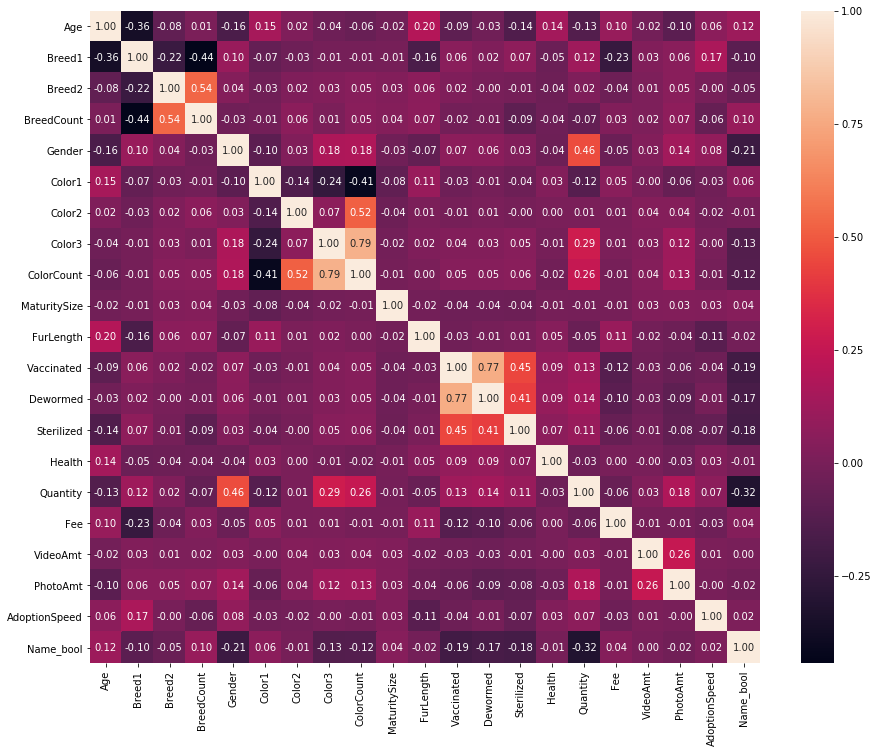

In [156]:
#Source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

import scipy.stats as ss
from pylab import savefig

def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted


def remove_incomplete_samples(x, y):
    x = [v if v is not None else np.nan for v in x]
    y = [v if v is not None else np.nan for v in y]
    arr = np.array([x, y]).transpose()
    arr = arr[~np.isnan(arr).any(axis=1)].transpose()
    if isinstance(x, list):
        return arr[0].tolist(), arr[1].tolist()
    else:
        return arr[0], arr[1]


def replace_nan_with_value(x, y, value):
    x = [v if v == v and v is not None else value for v in x]  # NaN != NaN
    y = [v if v == v and v is not None else value for v in y]
    return x, y



REPLACE = 'replace'
DROP = 'drop'
DROP_SAMPLES = 'drop_samples'
DROP_FEATURES = 'drop_features'
SKIP = 'skip'
DEFAULT_REPLACE_VALUE = 0.0

def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True, return_results=False, nan_strategy=REPLACE,
                 nan_replace_value=DEFAULT_REPLACE_VALUE, ax=None, **kwargs):
    """
    Calculate the correlation/strength-of-association of features in data-set with both categorical (eda_tools) and
    continuous features using:
     * Pearson's R for continuous-continuous cases
     * Correlation Ratio for categorical-continuous cases
     * Cramer's V or Theil's U for categorical-categorical cases
    **Returns:** a DataFrame of the correlation/strength-of-association between all features
    **Example:** see `associations_example` under `dython.examples`
    Parameters
    ----------
    dataset : NumPy ndarray / Pandas DataFrame
        The data-set for which the features' correlation is computed
    nominal_columns : string / list / NumPy ndarray
        Names of columns of the data-set which hold categorical values. Can also be the string 'all' to state that all
        columns are categorical, or None (default) to state none are categorical
    mark_columns : Boolean, default = False
        if True, output's columns' names will have a suffix of '(nom)' or '(con)' based on there type (eda_tools or
        continuous), as provided by nominal_columns
    theil_u : Boolean, default = False
        In the case of categorical-categorical feaures, use Theil's U instead of Cramer's V
    plot : Boolean, default = True
        If True, plot a heat-map of the correlation matrix
    return_results : Boolean, default = False
        If True, the function will return a Pandas DataFrame of the computed associations
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop_samples' to remove samples with missing values,
        'drop_features' to remove features (columns) with missing values, or 'replace' to replace all missing
        values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when nan_strategy is set to 'replace'
    ax : matplotlib ax, default = None
      Matplotlib Axis on which the heat-map will be plotted
    kwargs : any key-value pairs
        Arguments to be passed to used function and methods
    """
    dataset = convert(dataset, 'dataframe')
    if nan_strategy == REPLACE:
        dataset.fillna(nan_replace_value, inplace=True)
    elif nan_strategy == DROP_SAMPLES:
        dataset.dropna(axis=0, inplace=True)
    elif nan_strategy == DROP_FEATURES:
        dataset.dropna(axis=1, inplace=True)
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0, len(columns)):
        for j in range(i, len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]], dataset[columns[j]], nan_strategy=SKIP)
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]], dataset[columns[i]], nan_strategy=SKIP)
                        else:
                            cell = cramers_v(dataset[columns[i]], dataset[columns[j]], nan_strategy=SKIP)
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]], nan_strategy=SKIP)
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]], nan_strategy=SKIP)
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        if ax is None:
            #Modified by C. Jansson 01-11-2020 to adjust figure size and font size of annotation
            
            plt.figure(figsize= [15,12] )
            corr_map = sns.heatmap(corr, annot=kwargs.get('annot', True), annot_kws={"size": 10}, fmt=kwargs.get('fmt', '.2f'), ax=ax)
            #Save heatmap as image
            corr_img = corr_map.get_figure()    
            corr_img.savefig('corr_heatmap.png', dpi=400)
        if ax is None:
            plt.show()
    if return_results:
        return corr
    
    
    
associations(dogs_noname)

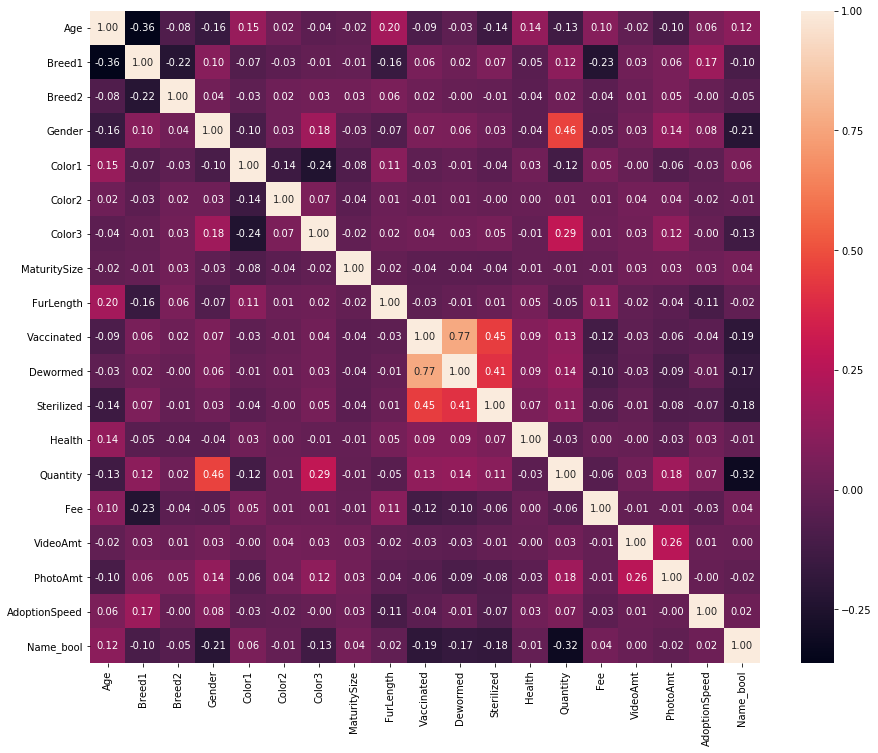

In [158]:
#Repeat the mapping but this time remove Breedcount and ColorCount

dogs_notab = dogs_noname.drop(['BreedCount','ColorCount'],axis=1)
associations(dogs_notab)

Interestingly enough, from this plot, it becomes evident that no single feature has an overwhelming impact on adoption speed. Those features with the highest impact are Breed, Gender, Age, and presence of a name. 

As we're mostly concerned with how each variable relates to adoption speed, additional investigation is unecessary, at this point. 